In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM

In [2]:
import yfinance as yf

In [3]:
dataset = yf.download('^NSEI','2010-01-01','2019-12-30')

[*********************100%***********************]  1 of 1 completed


In [4]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2019-12-20,12266.450195,12293.900391,12252.750000,12271.799805,12271.799805,810700
2019-12-23,12235.450195,12287.150391,12213.250000,12262.750000,12262.750000,604800
2019-12-24,12269.250000,12283.700195,12202.099609,12214.549805,12214.549805,470300


In [5]:
data = dataset['Close']

In [6]:
data

Date
2010-01-04     5232.200195
2010-01-05     5277.899902
2010-01-06     5281.799805
2010-01-07     5263.100098
2010-01-08     5244.750000
                  ...     
2019-12-20    12271.799805
2019-12-23    12262.750000
2019-12-24    12214.549805
2019-12-26    12126.549805
2019-12-27    12245.799805
Name: Close, Length: 2441, dtype: float64

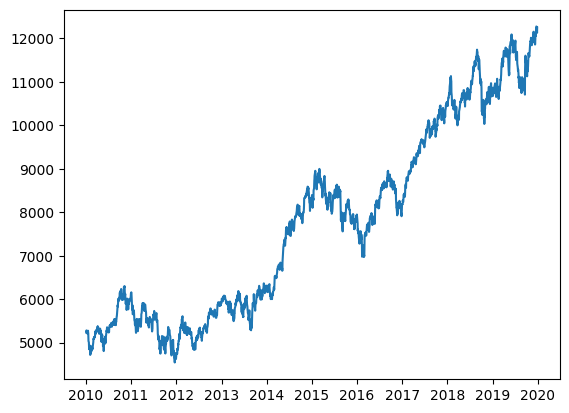

In [7]:
plt.plot(data)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

In [9]:
scaled_data

array([[0.08903153],
       [0.09494536],
       [0.09545003],
       ...,
       [0.99259149],
       [0.98120374],
       [0.99663544]])

In [10]:
# date_split = '2016-06-15' - 1576

train_data = scaled_data[:1576]
test_data = scaled_data[1576:]
len(train_data), len(test_data)

(1576, 865)

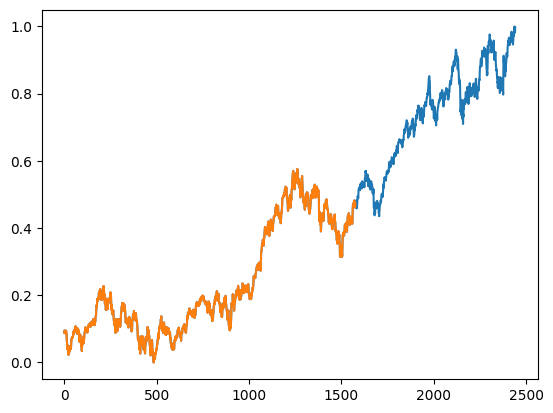

In [11]:
plt.plot(scaled_data)
plt.plot(train_data)

In [12]:
def sequence(data, sq_lnt):
    x, y = [], []
    for i in range(0,len(data) - sq_lnt):
        x.append(data[i:i+sq_lnt])
        y.append(data[i+sq_lnt])
    return np.array(x), np.array(y)


In [13]:
sq_lnt = 30

In [14]:
train_data.shape

(1576, 1)

In [15]:
x_train, y_train = sequence(train_data, sq_lnt)
x_test, y_test = sequence(test_data, sq_lnt)

In [65]:
x_train.shape

(1546, 30, 1)

In [17]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(sq_lnt,1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
49/49 [==============================] - 6s 27ms/step - loss: 0.0072
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 7.1408e-04
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 6.3024e-04
Epoch 4/20
49/49 [==============================] - 1s 28ms/step - loss: 6.1279e-04
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 5.6577e-04
Epoch 6/20
49/49 [==============================] - 3s 53ms/step - loss: 5.5235e-04
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 5.6921e-04
Epoch 8/20
49/49 [==============================] - 2s 32ms/step - loss: 4.7214e-04
Epoch 9/20
49/49 [==============================] - 1s 26ms/step - loss: 5.1494e-04
Epoch 10/20
49/49 [==============================] - 1s 26ms/step - loss: 4.4216e-04
Epoch 11/20
49/49 [==============================] - 2s 41ms/step - loss: 4.5941e-04
Epoch 12/20
49/49 [==============================] - 2s 31ms/step - loss: 4.40

In [20]:
train_loss = model.evaluate(x_train, y_train, verbose=0)
test_loss = model.evaluate(x_test, y_test, verbose=0)
print(f'Training loss: {train_loss}')
print(f'Testing loss: {test_loss}')

Training loss: 0.00022965141397435218
Testing loss: 0.0007523218519054353


In [21]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

27/27 [==============================] - 0s 10ms/step


In [22]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [23]:
x_train.shape

(1546, 30, 1)

In [102]:
df1 = pd.DataFrame(train_pred)
df2 = pd.DataFrame(test_pred)
dataf = data.reset_index()
dataf = dataf.drop(dataf.index[2381:])
df = pd.concat(([df1, df2]), ignore_index = True)
df['date'] = dataf['Date']

In [104]:
dataf

,Date,Close
0,2010-01-04,5232.200195
1,2010-01-05,5277.899902
2,2010-01-06,5281.799805
3,2010-01-07,5263.100098
4,2010-01-08,5244.750000
...,...,...
2376,2019-09-20,11274.200195
2377,2019-09-23,11600.200195
2378,2019-09-24,11588.200195
2379,2019-09-25,11440.200195


In [105]:
df = df.set_index('date')

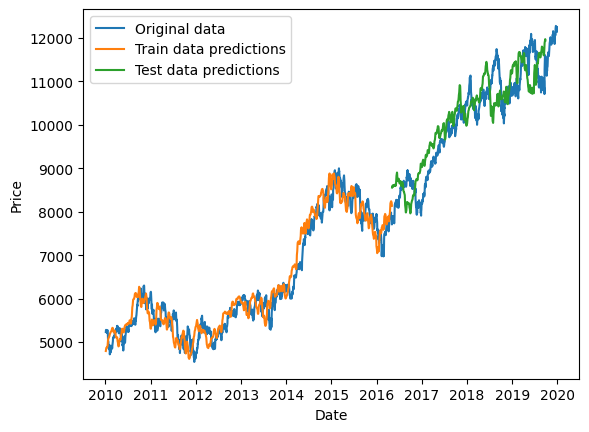

In [106]:
plt.plot(data, label = 'Original data')
plt.plot(df[:1546], label = 'Train data predictions')
plt.plot(df[1546:], label = 'Test data predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()